#Task 1: Data Exploration and Pre-processing

In [5]:
# Step 1: Import Necessary Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
import seaborn as sns

In [6]:
# Step 2: Load the Dataset
data = pd.read_csv('titanic.csv')  # Update with correct path if necessary

In [7]:
# Step 3: Explore the Dataset
print("Dataset Overview:")
print(data.head())
print("\nDataset Information:")
print(data.info())
print("\nMissing Values:")
print(data.isnull().sum())

Dataset Overview:
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500  

In [8]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [9]:
# Step 4: Handle Missing Values
# Fill missing values for Age with the median value
data['Age'].fillna(data['Age'].median(), inplace=True)

# Fill missing values for Embarked with the most common value (mode)
data['Embarked'].fillna(data['Embarked'].mode()[0], inplace=True)

# Drop rows with missing values in other columns
data.dropna(inplace=True)

C:\Users\pc\AppData\Local\Temp\ipykernel_13712\4142418059.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['Age'].fillna(data['Age'].median(), inplace=True)
C:\Users\pc\AppData\Local\Temp\ipykernel_13712\4142418059.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

#Task 2: Feature Engineering

In [11]:
# Feature Selection and Encoding
# Select relevant features
selected_features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
data = data[selected_features + ['Survived']]

In [12]:
# Encode categorical variables
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data = pd.get_dummies(data, columns=['Embarked'], drop_first=True)

#Task 3: Train a Logistic Regression Model

In [14]:
# Split Data into Training and Testing Sets
X = data.drop('Survived', axis=1)
y = data['Survived']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [15]:
# Train Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)

F:\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
def sigmoid(x):
    return 1/(1+np.exp(-x))

class LogisticRegression_Class():

    def __init__(self, lr=0.001, n_iters=1000):
        self.lr = lr
        self.n_iters = n_iters
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        # Ensure X is a float array to avoid dtype issues
        X = X.astype(np.float64)
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)
        self.bias = 0

        for _ in range(self.n_iters):
            linear_pred = np.dot(X, self.weights) + self.bias
            predictions = sigmoid(linear_pred)

            dw = (1/n_samples) * np.dot(X.T, (predictions - y))
            db = (1/n_samples) * np.sum(predictions - y)

            self.weights -= self.lr * dw
            self.bias -= self.lr * db

    def predict(self, X):
        X = X.astype(np.float64)  # Ensure input is float
        linear_pred = np.dot(X, self.weights) + self.bias
        y_pred = sigmoid(linear_pred)
        return [0 if y <= 0.5 else 1 for y in y_pred]

# Convert training data to float to prevent dtype issues
model_class = LogisticRegression_Class(lr=0.0001, n_iters=1000)
model_class.fit(X_train.to_numpy().astype(np.float64), y_train.to_numpy())

#Task 4: Model Evaluation

In [18]:
# Evaluate the Model
y_pred_class = model_class.predict(X_test)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred_class):.2f}")
print(f"Precision: {precision_score(y_test, y_pred_class):.2f}")
print(f"Recall: {recall_score(y_test, y_pred_class):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred_class):.2f}")

y_pred = model.predict(X_test)
print("\nModel Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.2f}")
print(f"Precision: {precision_score(y_test, y_pred):.2f}")
print(f"Recall: {recall_score(y_test, y_pred):.2f}")
print(f"F1 Score: {f1_score(y_test, y_pred):.2f}")


Model Evaluation:
Accuracy: 0.73
Precision: 0.73
Recall: 1.00
F1 Score: 0.85

Model Evaluation:
Accuracy: 0.80
Precision: 0.87
Recall: 0.87
F1 Score: 0.87


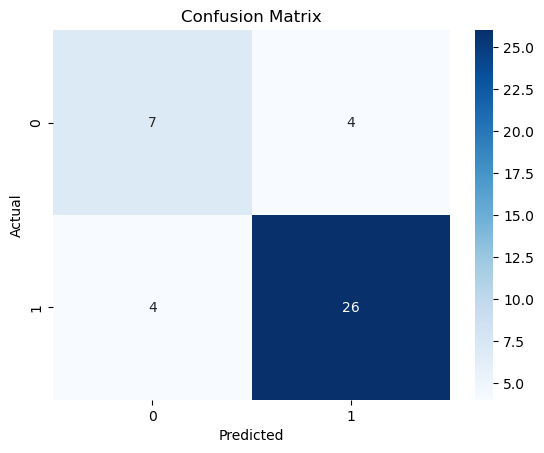

In [19]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

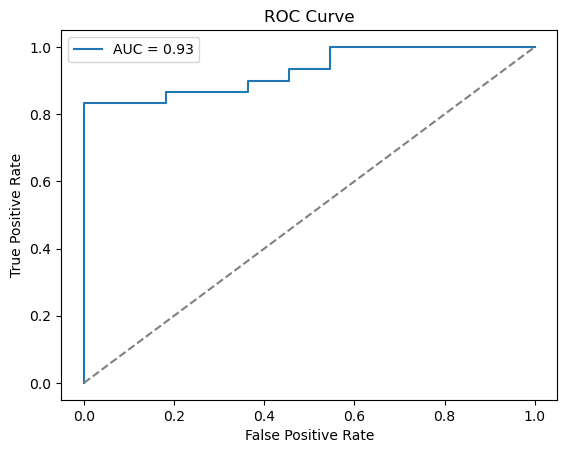

In [20]:
# ROC Curve
y_pred_prob = model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.title('ROC Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

#Task 5: Feature Importance Analysis

In [22]:
# Analyze Feature Importance
print("\nFeature Importance:")
coefficients = model.coef_[0]
feature_importance = pd.DataFrame({'Feature': X.columns, 'Coefficient': coefficients})
feature_importance = feature_importance.sort_values(by='Coefficient', ascending=False)
print(feature_importance)


Feature Importance:
      Feature  Coefficient
1         Sex     2.291609
3       SibSp     0.151817
5        Fare     0.001044
2         Age    -0.031240
7  Embarked_S    -0.355071
4       Parch    -0.362310
0      Pclass    -0.386521
6  Embarked_Q    -0.558064


#Task 6: Make Predictions for New Unseen Passengers

In [24]:
# Make Predictions for New Passengers
new_passenger = pd.DataFrame({
    'Pclass': [1],
    'Sex': [1],  # 1 for female
    'Age': [29],
    'SibSp': [0],
    'Parch': [0],
    'Fare': [100],
    'Embarked_Q': [0],
    'Embarked_S': [1]
})

In [25]:
predicted_survival = model.predict(new_passenger)
print(f"\nPredicted Survival for New Passenger: {'Survived' if predicted_survival[0] == 1 else 'Not Survived'}")


Predicted Survival for New Passenger: Survived
